<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="float:right; max-width: 250px; display: inline"  alt="Wikistat"/></a>
</center>

# [Scénarios d'Exploration Statistique](https://github.com/wikistat/Exploration)

# Initiation à l'AFC avec <a href="https://cran.r-project.org/"><img src="https://cran.r-project.org/Rlogo.svg" style="max-width: 40px; display: inline" alt="R"/></a>
# De la SVD à l'AFC - exemple élémentaire
#### Résumé 
Décomposition en valeurs singulières [SVD](http://wikistat.fr/pdf/st-m-explo-alglin.pdf) d'une matrice rectangulaire comme introduction à l'[Analyse Factorielle des Correspondances](http://wikistat.fr/pdf/st-m-explo-afc.pdf) (AFC); illustration sur des données élémentaires avec R puis avec le package [`FactoMineR`](http://factominer.free.fr/).

#### Avertissement
Les différents travaux et analyses proposés tout au long de ces documents sont largement explicités. Les commandes en R ou Python toutes fournies. L'important n'est pas de trouver la bonne syntaxe des commandes ni de finir au plus vite mais de réfléchir sur les méthodes, leurs conditions d'applications, les résultats obtenus. L'apprentissage de ces logiciels et de leur programmation est dispensés dans d'autres tutoriels.

Répondre aux questions **Q** tout au long de la réalisation.

## 1 Données
Les données sont une table de contingence croisant une variable de catégorie socioprofessionnelle avec un type d'hébergement en vacances mais sous une forme particulière car archivée en trois colonnes. La première contient l'effectif conjoint des modalités contenus dans les colonnes suivantes. La deuxième colonne est le code de catégorie socioprofessionnelle et la 3ème  le code correspondant à un type d'hébergement. La signification des modalités est la suivante : 

* CAMP : camping 
* HOTE : hotel 
* IRSP : invité en résidence principale
* IRSS : invité en résidence secondaire
* LOCA : location 
* RESS : résidence secondaire
* AUTR : autres


* cadm : cadre moyen
* empl : employé
* esag : exploitant ou salarié agricole
* inac : retraité
* lib : profession libérale
* oups : ouvrier ou personnel de service
* paic : patron de l'industrie ou du commerce

### Lecture, description des données
Les donnéees sont dans le fichier `vaccsp.dat`. Attention , les données ne sont pas sous une forme adaptée à la fonction `table`; il faut utiliser la fonction `xtab` pour définir la table de contingence associée.

In [124]:
vaccsp <- read.table("Data/vaccsp.dat", col.names = c("effectif", "CSP", "heber"))
summary(vaccsp)

    effectif        CSP     heber  
 Min.   :  16.0   cadm:7   AUTR:7  
 1st Qu.: 269.0   empl:7   CAMP:7  
 Median : 462.0   esag:7   HOTE:7  
 Mean   : 622.1   inac:7   IRPP:7  
 3rd Qu.: 727.0   libe:7   IRSC:7  
 Max.   :3647.0   oups:7   LOCA:7  
                  paic:7   RESS:7  

In [125]:
# construire la table de contingence
T <- xtabs(effectif ~ CSP + heber, vaccsp)
T

      heber
CSP    AUTR CAMP HOTE IRPP IRSC LOCA RESS
  cadm  469 1320  738 1732  519  988  488
  empl  301  499  317  825  199  480  138
  esag   36  176   92  162   16   70   22
  inac  269  361  923 1297  285  462  417
  libe  414  600  677 1059  536  727  532
  oups  671 3196  838 3647  325 1289  514
  paic   85  331  387  446  123  344  143

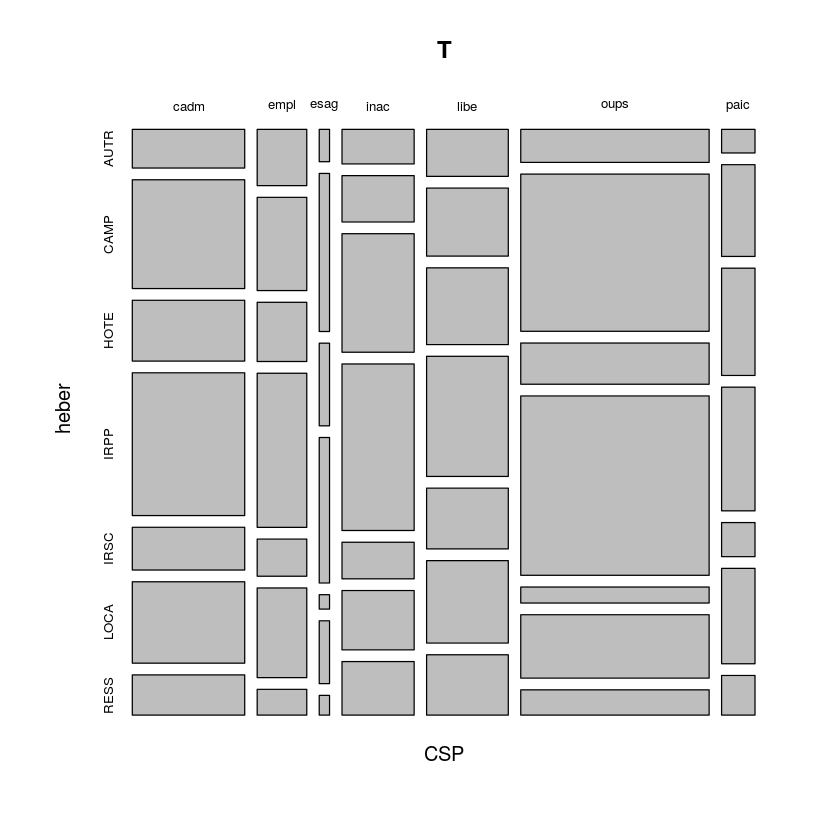

In [126]:
# graphe associé
mosaicplot(T)

**Q** Quel est ce graphique ? Est-il facile à interpréter ?

In [127]:
# test du chi2
chisq.test(T)


	Pearson's Chi-squared test

data:  T
X-squared = 2628.7, df = 36, p-value < 2.2e-16


**Q** Conclusion sur la description de ces variables, de leur liaison.

## 2 AFC pas à pas
### 2.1 Calcul des marges, métriques et profils.

In [128]:
# Fréquences marginales ou barycentres
n <- sum(T)
gc <- colSums(T) / n
gr <- rowSums(T) / n

In [129]:
# Métriques
Dr <- diag(gr)
Dc <- diag(gc)
Dr1 <- diag(1 / gr)
Dc1 <- diag(1 / gc)

In [130]:
# Profils lignes et colonnes
A <- t(T) %*% Dr1 / n
B <- T %*% Dc1 / n
dimnames(A) <- dimnames(t(T))
dimnames(B) <- dimnames(T)
A
B

,cadm,empl,esag,inac,libe,oups,paic
AUTR,0.07499201,0.10909750,0.06271777,0.06701545,0.09108911,0.06402672,0.04572351
CAMP,0.21106492,0.18086263,0.30662021,0.08993523,0.13201320,0.30496183,0.17805272
HOTE,0.11800448,0.11489670,0.16027875,0.22994519,0.14895490,0.07996183,0.20817644
IRPP,0.27694276,0.29902138,0.28222997,0.32311908,0.23300330,0.34799618,0.23991393
IRSC,0.08298689,0.07212758,0.02787456,0.07100149,0.11793179,0.03101145,0.06616460
LOCA,0.15797889,0.17397608,0.12195122,0.11509716,0.15995600,0.12299618,0.18504572
RESS,0.07803006,0.05001812,0.03832753,0.10388640,0.11705171,0.04904580,0.07692308


,AUTR,CAMP,HOTE,IRPP,IRSC,LOCA,RESS
cadm,0.20890869,0.20360944,0.18580060,0.18891798,0.259111333,0.22660550,0.216503993
empl,0.13407572,0.07697054,0.07980866,0.08998691,0.099350974,0.11009174,0.061224490
esag,0.01603563,0.02714793,0.02316213,0.01767016,0.007988018,0.01605505,0.009760426
inac,0.11982183,0.05568410,0.23237664,0.14147033,0.142286570,0.10596330,0.185004437
libe,0.18440980,0.09254975,0.17044310,0.11551047,0.267598602,0.16674312,0.236024845
oups,0.29888641,0.49298164,0.21097684,0.39779668,0.162256615,0.29564220,0.228039042
paic,0.03786192,0.05105661,0.09743202,0.04864747,0.061407888,0.07889908,0.063442768


**Q** Commenter les résultats ci-dessous : à quelle classe de matrices appartiennent A, B, AB, BA ? Que dire de leurs valeurs propres ? Que dire de celles de AB (ou BA) ? 

In [131]:
colSums(A); colSums(B); colSums(A %*% B)
eigen(A)$values
eigen(A %*% B)$values

cadm empl esag inac libe oups paic 
   1    1    1    1    1    1    1

AUTR CAMP HOTE IRPP IRSC LOCA RESS 
   1    1    1    1    1    1    1

AUTR CAMP HOTE IRPP IRSC LOCA RESS 
   1    1    1    1    1    1    1

[1]  1.000000000+0.0000000i  0.028385815+0.1088364i  0.028385815-0.1088364i
[4] -0.089941408+0.0000000i  0.057710682+0.0000000i  0.042215077+0.0000000i
[7] -0.009652463+0.0000000i

[1] 1.000000e+00 6.539403e-02 1.345722e-02 3.866352e-03 3.062026e-03
[6] 3.884040e-04 5.970212e-05

**Q** Commenter les résultats ci-dessous. Quel vecteur propre associé à quelle valeur propre ?

In [132]:
A %*% B %*% gc - gc

AUTR,0.000000e+00
CAMP,0.000000e+00
HOTE,0.000000e+00
IRPP,5.551115e-17
IRSC,1.387779e-17
LOCA,0.000000e+00
RESS,0.000000e+00


In [133]:
B %*% A %*% gr - gr

cadm,-2.775558e-17
empl,-1.387779e-17
esag,0.000000e+00
inac,0.000000e+00
libe,2.775558e-17
oups,5.551115e-17
paic,0.000000e+00


### 2.2 AFC et double ACP

**Q** Quelles sont les ACPs qui définissent l'AFC ?

**Q** De quelles matrices faut-il alors calculer la SVD et par rapport à quelles métriques ? 

**Attention**, la SVD est dite *généralisée* car calculée par rapport à des métriques spécifiques différentes de celle usuelle (matrice identité). Se reporter au [scénario précédent]() pour plus d'explications. Il n'est pas possible d'utiliser directement une fonction comme par exemple `prcomp` ou `princomp` pour calculer les ACPs conduisant à l'AFC à cause de ce changement de métrique. Attention dans la construction des matrices, la matrice `T` est dans cet exemple carrée (autant de modalités lignes que colonnes) mais il ne faut pas confondre le rôle des métriques. 

In [134]:
# SVD de 1/nT relative à Dr-1 et Dc-1
Drm12 <- diag(1 / sqrt(gr))
Dcm12 <- diag(1 / sqrt(gc))
res <- svd(Drm12 %*% T %*% Dcm12 / n)
res$d

[1] 1.000000000 0.255722558 0.116005249 0.062180001 0.055335574 0.019707968
[7] 0.007726715

**Q** Pourquoi en AFC, centrer les matrices revient à éliminer la valeur propre 1 et le vecteur propre associé?

In [135]:
L <- res$d[-1]

In [136]:
# Rechangement de métrique
U <- diag(sqrt(gr)) %*% res$u[, -1]
V <- diag(sqrt(gc)) %*% res$v[, -1]

In [137]:
# Vérifications de la chi2-orthonormalité
t(U) %*% Dr1 %*% U

1.000000e+00,4.857226e-17,-2.498002e-16,3.122502e-17,4.996004e-16,-2.775558e-17
6.245005e-17,1.000000e+00,0.000000e+00,-1.873501e-16,-1.249001e-16,-1.387779e-16
-1.665335e-16,0.000000e+00,1.000000e+00,4.024558e-16,-1.387779e-16,0.000000e+00
3.122502e-17,-1.873501e-16,3.885781e-16,1.000000e+00,-2.220446e-16,-5.551115e-17
5.065393e-16,-7.632783e-17,-1.665335e-16,-2.220446e-16,1.000000e+00,8.326673e-17
6.938894e-18,-1.249001e-16,5.551115e-17,-4.163336e-17,4.163336e-17,1.000000e+00


In [138]:
t(V) %*% Dc1 %*% V

1.000000e+00,-1.179612e-16,4.163336e-17,8.326673e-17,2.671474e-16,1.387779e-16
-2.255141e-16,1.000000e+00,-4.284767e-16,1.249001e-16,-1.604619e-16,-5.551115e-17
-6.938894e-18,-4.284767e-16,1.000000e+00,0.000000e+00,5.724587e-17,-8.326673e-17
1.110223e-16,1.595946e-16,-1.387779e-17,1.000000e+00,5.551115e-17,-2.220446e-16
2.046974e-16,-1.604619e-16,1.110223e-16,6.938894e-18,1.000000e+00,9.020562e-17
1.387779e-16,1.387779e-17,-5.551115e-17,-2.775558e-16,6.245005e-17,1.000000e+00


### 2.3 Calcul des composantes et graphiques

**Q** Quelles sont les quantités calculées ci-dessous ?

In [139]:
Cr <- Dr1 %*% U %*% diag(L)
Cc <- Dc1 %*% V %*% diag(L)
ratio <- L^2 / sum(L^2)

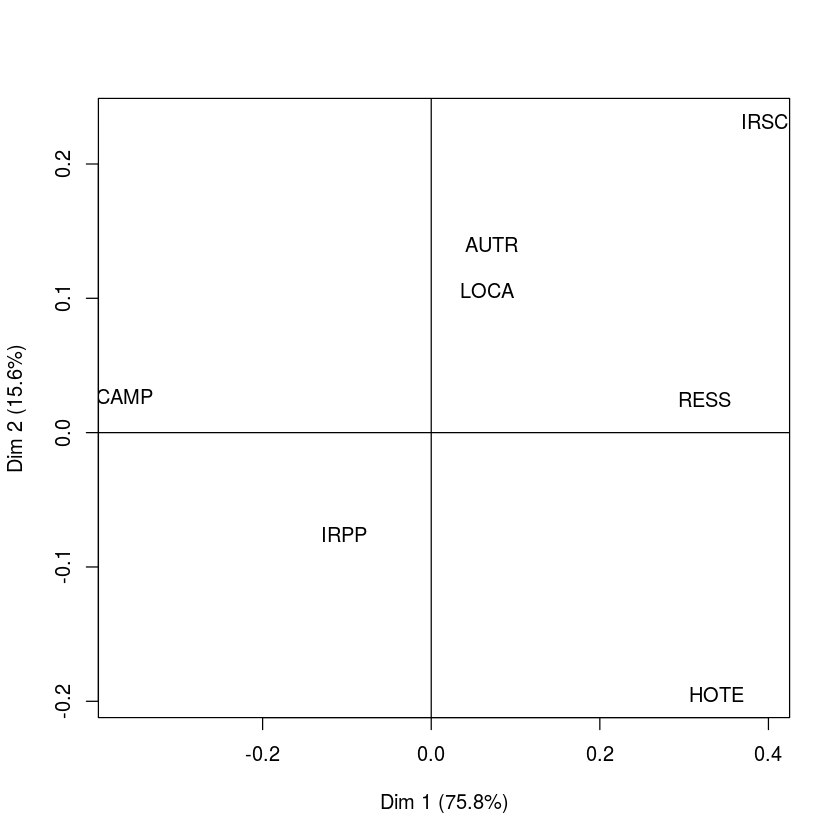

In [140]:
# représentations graphiques
plot(Cc, type = "n", 
     xlab = paste("Dim 1 (", round(100 * ratio[1], 1), "%)", sep = ""),
     ylab = paste("Dim 2 (", round(100 * ratio[2], 1), "%)", sep = ""))
text(Cc, colnames(T))
abline(h = 0, v = 0)

Interpréter le graphique ci-dessus :

**Q** Que sont les individus ? Que représente l'individu central de coordonnées (0, 0) ?

**Q** Que représente le pourcentage d'inertie calculé pour chaque axe factoriel ?

**Q** Que représente la distance entre les individus ? Considérons le cas de CAMP et RESS d'une part, et AUTR et LOCA d'autre part. Interpréter. Le résultat est-il visible sur la table de contingence ?

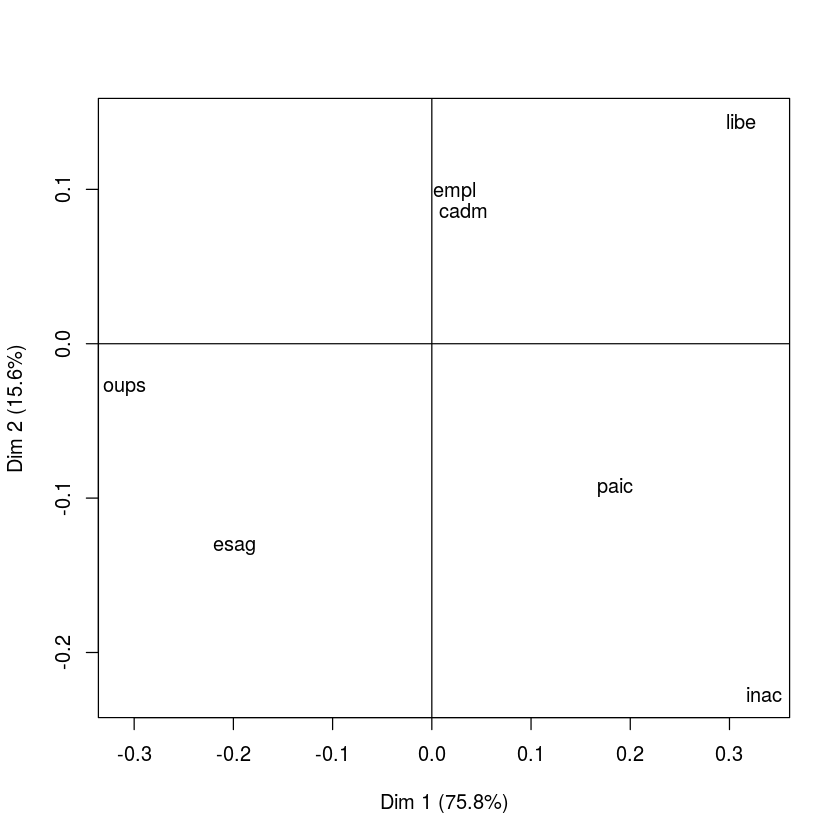

In [141]:
plot(Cr, type = "n", 
     xlab = paste("Dim 1 (", round(100 * ratio[1], 1), "%)", sep = ""),
     ylab = paste("Dim 2 (", round(100 * ratio[2], 1), "%)", sep = ""))
text(Cr, rownames(T))
abline(h = 0, v = 0)

**Q** Mêmes questions concernant l'interprétation. Pourquoi a t'on les même pourcentages d'inertie ?

## 3 Avec `FactoMineR`
Rien de bien compliqué dans ces instructions mais autant utiliser une librairie qui propose directement des graphiques de meilleure qualité avec une offre détaillée d'options.


Call:
CA(X = T, graph = F) 

The chi square of independence between the two variables is equal to 2628.652 (p-value =  0 ).

Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6
Variance               0.065   0.013   0.004   0.003   0.000   0.000
% of var.             75.839  15.607   4.484   3.551   0.450   0.069
Cumulative % of var.  75.839  91.445  95.929  99.480  99.931 100.000

Rows
       Iner*1000    Dim.1    ctr   cos2    Dim.2    ctr   cos2    Dim.3    ctr
cadm |     1.932 |  0.032  0.316  0.107 |  0.087 11.409  0.795 | -0.021  2.385
empl |     3.504 |  0.023  0.074  0.014 |  0.098  6.505  0.250 |  0.045  4.808
esag |     1.755 | -0.199  1.136  0.423 | -0.132  2.436  0.187 | -0.139  9.440
inac |    22.030 |  0.335 22.568  0.670 | -0.227 50.561  0.309 |  0.060 12.065
libe |    18.086 |  0.312 22.130  0.800 |  0.144 22.990  0.171 |  0.018  1.191
oups |    33.583 | -0.310 50.599  0.985 | -0.029  2.177  0.009 |  0.015  1.948
paic |     5.339 |  0.185  

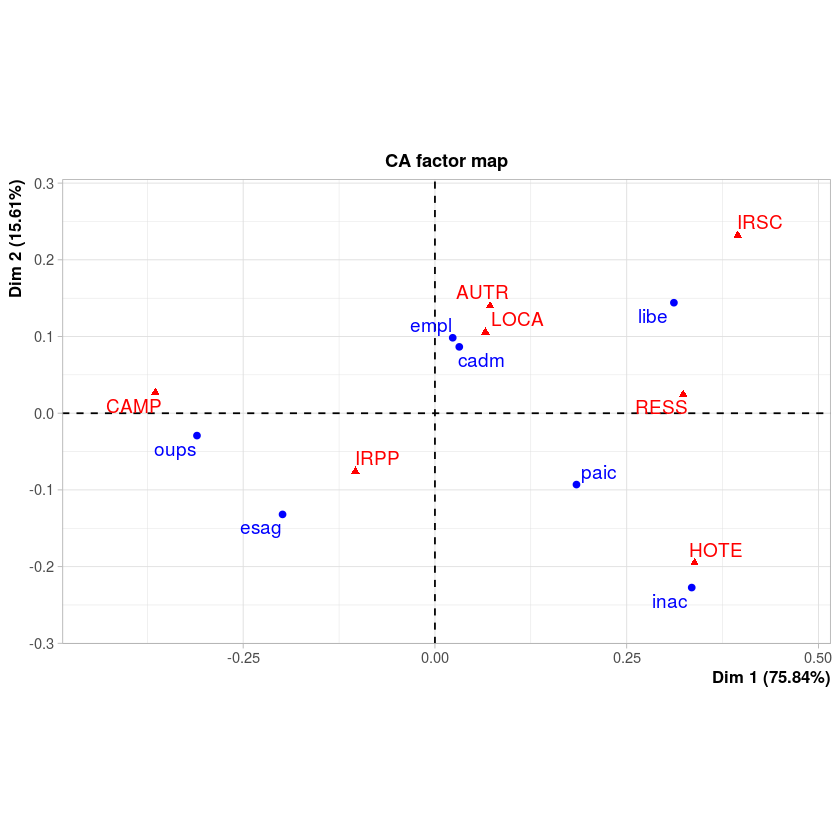

In [142]:
# Charger la librairie
library(FactoMineR)
# Analyse des correspondances
afc <- CA(T, graph = F)
summary(afc)
plot(afc)

Comparer les résultats avec ceux précédemment obtenus.

**Q** Comment se justifie la double représentation des modalités lignes et colonnes sur le même graphique ?

**Q** Quelle interprétation en faire ? En particulier, interpréter la proximité entre CAMP et oups. Interpréter l'orthogonalité entre les vecteurs esag et HOTE (tracés à partir du centre).

## Données de sociologie
On reprend ici un jeu de données étudié par le sociologue Pierre Bourdieu, présentées dans le polycopié de cours de Xavier Gendre, 

https://www.math.univ-toulouse.fr/~xgendre/

concernant 8869 étudiants. On dispose de la catéogorie socioprofessionnelle du père :

* EAG : Exploitant agricole
* SAG : Salarié agricole
* PT : Patron
* PLCS : Profession libérale & cadre supérieur
* CM : Cadre moyen
* EMP : Employé
* OUV : Ouvrier
* OTH : Autre

et le type d'étude suivie par l'étudiant :

* DR : Droit
* SCE : Sciences économiques
* LET : Lettres
* SC : Sciences
* MD : Médecine ou dentaire
* PH : Pharmacie
* PD : Pluridisciplinaire
* IUT : Institut Universitaire de Technologie

Il s'agit d'étudier la reproductibilité sociale, i.e. de savoir si la profession des parents a un lien avec le type d'études suivi par les enfants.

**Q** Réaliser une analyse de correspondance. Répondre à la question posée.

**Q** Certaines modalités ont des effectifs faibles. Quelle conséquence sur les résultats ? Comment regrouper les modalités ? Refaire l'analyse avec les modalités regroupées.

In [143]:
T <- read.table("Data/dataBourdieu.dat")

## Accord de partitions de différents clusterings
On considère les différents clusterings réalisés dans le notebook MARS (ou un autre de votre choix).
On veut étudier la correspondance entre les partitions retournées par :
* la classification hiérarchique ascendante (CAH) à K1 classes et la CAH à K2 classes.
* k-means avec K classes, sur les données brutes et sur les scores de l'ACP
* k-means avec K1 classes et CAH avec K2 classes
* etc.

**Q** Dans chaque cas, afficher la table de contingence. Afficher les valeurs propres obtenues avec l'AFC. Que signifie une valeur propre proche de 1 ? Interpréter les résultats de l'AFC.